<a href="https://colab.research.google.com/github/Koruvika/Koruvika.github.io/blob/master/K_rank_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# K-rank approximation on SVD

Cho ma trận A có kích thước (m x n).

Ta có thể tìm ma trận B có rank(B) = k < min(m,n) bời phương pháp Reduced SVD: 

$A = U.Σ.V^H$ với $U = (U_L | U_R)$, $V = (V_L|V_R)$, $Σ = \left\lceil
\begin{matrix}
Σ_{TL} & 0\\
0 & Σ_{BR}
\end{matrix}
\right\rceil$

$=> B = U_L.Σ_{TL}.V^H_{L}$ : K-rank approximation matrix

Phương pháp này ta có thể tách ma trận (m x n) thành (m x k) + (k x k) + (k x n) với k < min(m,n) giúp nén ma trận, giảm bộ nhớ lưu trữ với k đủ nhỏ.

In [88]:
ls

drive/  sample_data/


In [89]:
img = cv2.imread('drive/MyDrive/ALAFF/Frida.jpg')

In [90]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

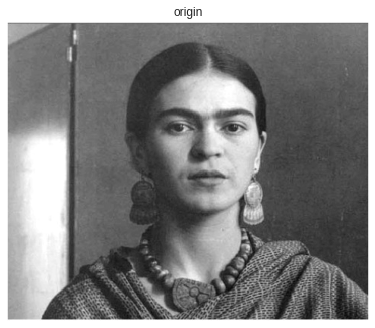

In [91]:
plt.imshow(img, cmap='gray')
plt.title('origin')
plt.axis('off')
plt.show()

In [92]:
(m, n) = img.shape

In [93]:
m

395

In [94]:
u, sigma, v = np.linalg.svd(img)

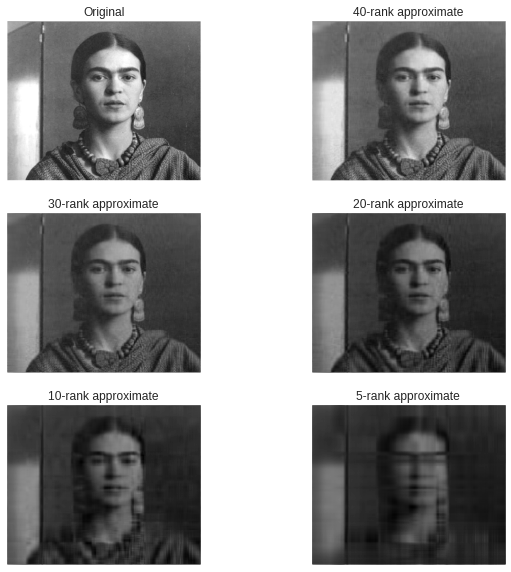

In [95]:
fig = plt.figure(figsize=(10,10))

columns = 2
rows = 3
ks = [0, 5, 10, 20, 30, 40]

fig.add_subplot(rows, columns, 1)
plt.title(f'Original')
plt.axis('off')
plt.imshow(img, cmap='gray')

for i in range(1,rows*columns):
    k = ks[len(ks)-i]
    ui = u[:, :k]
    si = np.diag(sigma[:k])
    vi = v[:k, :]
    img_k = ui @ si @ vi
    fig.add_subplot(rows, columns, i+1)
    plt.title(f'{k}-rank approximate')
    plt.axis('off')
    plt.imshow(img_k, cmap='gray')

# Choose the best k-rank approximation

In [96]:
np.min(sigma), np.max(sigma)

(1.301339919003484, 57371.01249016746)

Thông thường, ta lựa chọn k bằng cách loại bỏ đi những giá trị singular xấp xỉ 0. Tuy nhiên trong bài toán toán các singular có giá trị tương đối lớn nên ta sẽ đặt một threshold lớn hơn.

In [97]:
def choose_k(sigma, threshold = 0.1):
    k = np.sum(sigma > threshold)
    return k

choose_k(sigma, 100)

143

In [98]:
holds = [10, 20, 50, 100, 200, 500, 1000]
ks = [choose_k(sigma, hold) for hold in holds]
ks

[305, 263, 196, 143, 96, 46, 19]

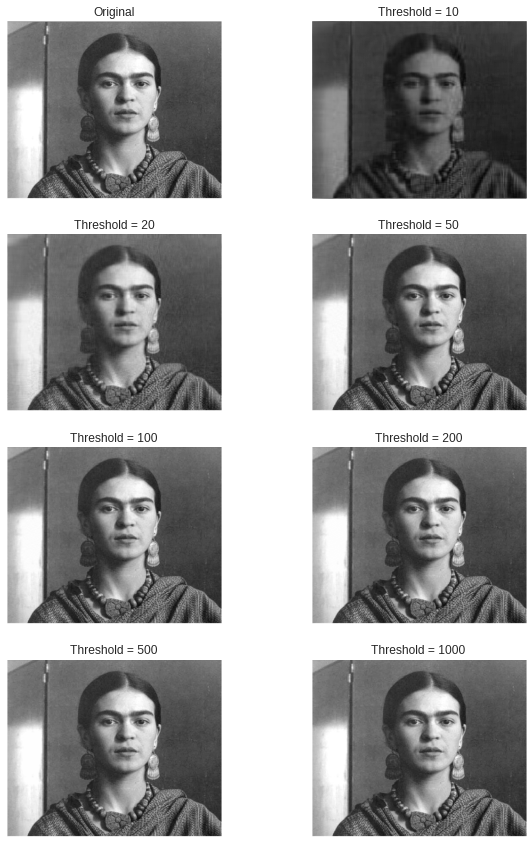

In [105]:
fig = plt.figure(figsize=(10,15))

columns = 2
rows = 4

fig.add_subplot(rows, columns, 1)
plt.title(f'Original')
plt.axis('off')
plt.imshow(img, cmap='gray')

for i in range(1,rows*columns):
    k = ks[len(ks)-i]
    ui = u[:, :k]
    si = np.diag(sigma[:k])
    vi = v[:k, :]
    img_k = ui @ si @ vi
    fig.add_subplot(rows, columns, i+1)
    plt.title(f'Threshold = {holds[i-1]}')
    plt.axis('off')
    plt.imshow(img_k, cmap='gray')

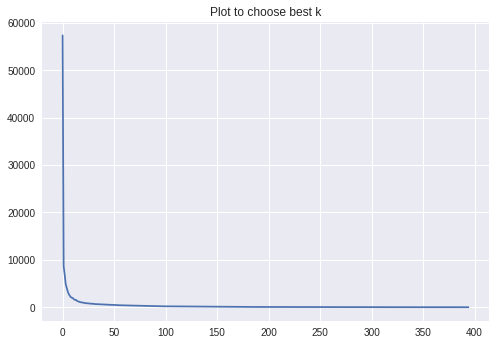

In [ ]:
plt.style.use('seaborn')
plt.plot(sigma)
plt.title('Plot to choose best k')
plt.show()

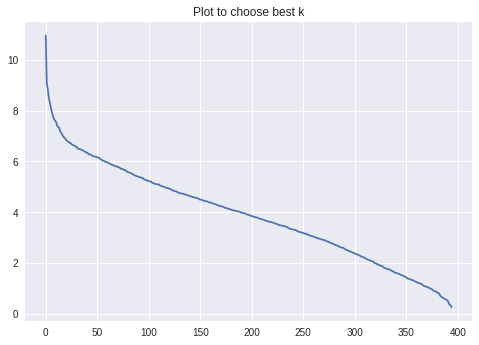

In [ ]:
plt.style.use('seaborn')
plt.plot(np.log(sigma))
plt.title('Plot to choose best k')
plt.show()

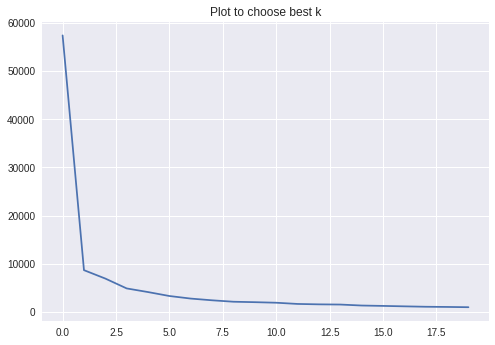

In [ ]:
plt.style.use('seaborn')
plt.plot((sigma[:20]))
plt.title('Plot to choose best k')
plt.show()

# Mot vi du khac

In [65]:
img = cv2.imread('drive/MyDrive/ALAFF/rose.jpeg')

In [66]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

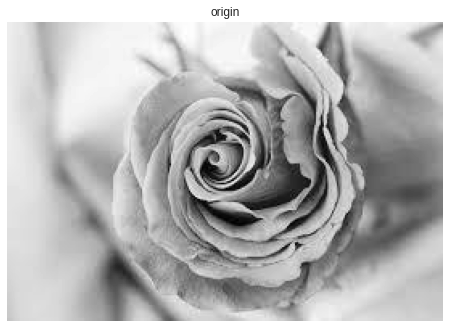

In [67]:
plt.imshow(img, cmap='gray')
plt.title('origin')
plt.axis('off')
plt.show()

In [68]:
(m, n) = img.shape

In [69]:
m,n

(186, 271)

In [70]:
u, sigma, v = np.linalg.svd(img)

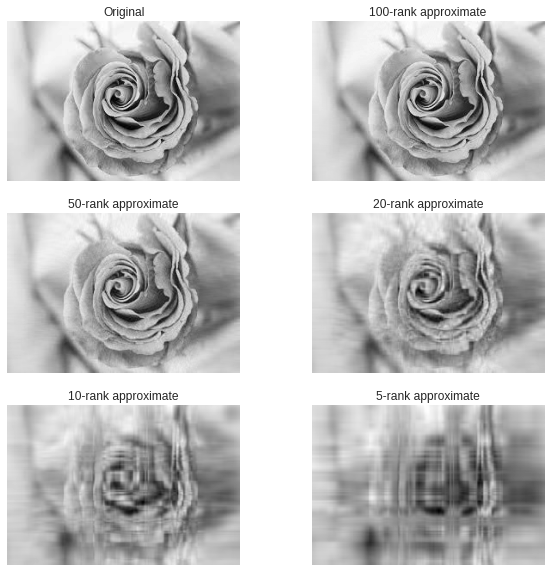

In [71]:
fig = plt.figure(figsize=(10,10))

columns = 2
rows = 3
ks = [0, 5, 10, 20, 50, 100]

fig.add_subplot(rows, columns, 1)
plt.title(f'Original')
plt.axis('off')
plt.imshow(img, cmap='gray')

for i in range(1,rows*columns):
    k = ks[len(ks)-i]
    ui = u[:, :k]
    si = np.diag(sigma[:k])
    vi = v[:k, :]
    img_k = ui @ si @ vi
    fig.add_subplot(rows, columns, i+1)
    plt.title(f'{k}-rank approximate')
    plt.axis('off')
    plt.imshow(img_k, cmap='gray')

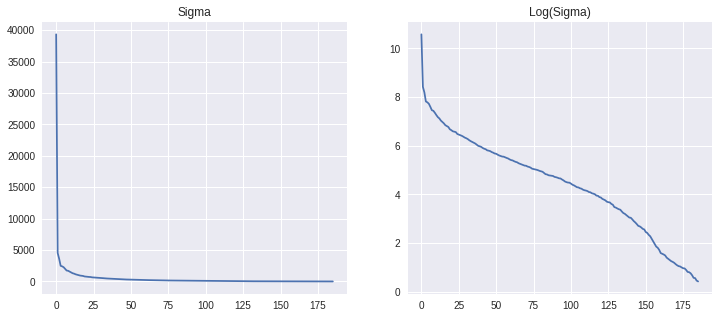

In [79]:
fig = plt.figure(figsize=(12,5))


fig.add_subplot(1, 2, 1)
plt.title('Sigma')
plt.plot((sigma))
fig.add_subplot(1, 2, 2)
plt.title('Log(Sigma)')
plt.plot(np.log(sigma))
plt.show()

In [73]:
sigma

array([3.93218310e+04, 4.54016400e+03, 3.60846865e+03, 2.48845106e+03,
       2.40282963e+03, 2.26345285e+03, 1.99462511e+03, 1.73927435e+03,
       1.69675751e+03, 1.56412623e+03, 1.42443532e+03, 1.30811573e+03,
       1.24112970e+03, 1.13684688e+03, 1.07093394e+03, 1.01409916e+03,
       9.39324238e+02, 9.06941134e+02, 8.73550967e+02, 7.94903785e+02,
       7.65251878e+02, 7.30854299e+02, 7.18152588e+02, 7.07064093e+02,
       6.54960059e+02, 6.39151747e+02, 6.23802378e+02, 6.06995939e+02,
       5.86873029e+02, 5.64016181e+02, 5.49461009e+02, 5.30945028e+02,
       5.06030940e+02, 4.86966504e+02, 4.71947190e+02, 4.58557754e+02,
       4.42238230e+02, 4.21738831e+02, 4.01758794e+02, 3.94192269e+02,
       3.84628182e+02, 3.67928634e+02, 3.56688838e+02, 3.49440327e+02,
       3.33784549e+02, 3.29467915e+02, 3.23358028e+02, 3.11171127e+02,
       3.03486700e+02, 2.93250146e+02, 2.90329469e+02, 2.79164926e+02,
       2.70614247e+02, 2.64147434e+02, 2.58769539e+02, 2.57274958e+02,
      